# Logistic regression
The purpose of this model is to classify people into two groups, below 50k or above 50k in income. We will build the model using training data, and then predict the salary class using the test group.

In [1]:
#load datafram from pickle
import pandas as pd
df = pd.read_pickle("adultRecoded.pkl")

In logistic regression models, encoding all of the independent variables as dummy variables allows easy interpretation and calculation of 
the odds ratios, and increases the stability and significance of the coefficients.

In [2]:
df.dtypes
#data2 = pd.get_dummies(data, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])
#show only categorical variables
df.select_dtypes(include=['object'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary,workclassR,workclassR2,marital-statusR,countryR
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,Self-emp,Self-emp,Married,north.america
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,Private,Private,Not-Married,north.america
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,Private,Private,Married,north.america
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K,Private,Private,Married,north.america
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K,Private,Private,Married,north.america
5,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,Jamaica,<=50K,Private,Private,Married,north.america
6,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K,Self-emp,Self-emp,Married,north.america
7,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,>50K,Private,Private,Never-married,north.america
8,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K,Private,Private,Married,north.america
9,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,United-States,>50K,Private,Private,Married,north.america


In [3]:
#check workclass r2
df_dummies = pd.get_dummies(df, columns =['workclassR', 'marital-statusR', 'countryR', 'sex', 'salary'])
df_dummies #after creating dummies we end up with the original data plus dummies, we need to remove the rows we don't want to include in regression

df_dummies.drop('workclass', axis=1, inplace=True)
df_dummies.drop('workclassR2', axis=1, inplace=True)
df_dummies.drop('education', axis=1, inplace=True)
df_dummies.drop('education-num', axis=1, inplace=True)
df_dummies.drop('marital-status', axis=1, inplace=True)
df_dummies.drop('occupation', axis=1, inplace=True)
df_dummies.drop('relationship', axis=1, inplace=True)
df_dummies.drop('race', axis=1, inplace=True)
df_dummies.drop('native-country', axis=1, inplace=True)
df_dummies.drop('capital-gain', axis=1, inplace=True)
df_dummies.drop('capital-loss', axis=1, inplace=True)
df_dummies.drop('marital-statusR_Not-Married', axis=1, inplace=True)
df_dummies.drop('marital-statusR_Never-married', axis=1, inplace=True)
df_dummies.drop('sex_Male', axis=1, inplace=True) #because for binary variables we only need one of the 2 dummy variables produced
df_dummies.drop('workclassR_Private', axis=1, inplace=True) #because it correlates with Unemployed
df_dummies.drop('salary_<=50K', axis=1, inplace=True) # we a re leaving 'salary_>50K' with 1s and 0s as values
df_dummies

,age,fnlwgt,hours-per-week,workclassR_Gov,workclassR_Self-emp,workclassR_Unemployed,marital-statusR_Married,countryR_asia,countryR_europe,countryR_north.america,countryR_other,countryR_south.america,sex_Female,salary_>50K
0,50,83311,13,0,1,0,1,0,0,1,0,0,0,0
1,38,215646,40,0,0,0,0,0,0,1,0,0,0,0
2,53,234721,40,0,0,0,1,0,0,1,0,0,0,0
3,28,338409,40,0,0,0,1,0,0,1,0,0,1,0
4,37,284582,40,0,0,0,1,0,0,1,0,0,1,0
5,49,160187,16,0,0,0,1,0,0,1,0,0,1,0
6,52,209642,45,0,1,0,1,0,0,1,0,0,0,1
7,31,45781,50,0,0,0,0,0,0,1,0,0,1,1
8,42,159449,40,0,0,0,1,0,0,1,0,0,0,1
9,37,280464,80,0,0,0,1,0,0,1,0,0,0,1


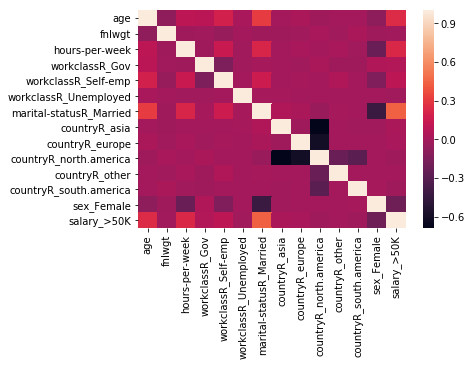

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_dummies.corr())
plt.show()
#what does it actually mean with categorical variables???
#heatmap helps to see correlations between independent variabes

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

#There are 2 ways of splitting into train and test
################# TEST-TRAIN SPLIT 1 ############################
#train, test = train_test_split(df_dummies, test_size=0.2) #one way of splitting
#list predictors and dependent variable
cols = ["sex_Female", "age","fnlwgt","hours-per-week","workclassR_Gov","workclassR_Self-emp","workclassR_Unemployed","marital-statusR_Married","countryR_asia", "countryR_europe", "countryR_south.america", "countryR_europe", "countryR_north.america", "countryR_other"] 
X = df_dummies[cols]
df_dummies.rename(columns={'salary_>50K': 'highSalary'}, inplace=True)#python won't like the special character later
y = df_dummies['highSalary']
train, test = train_test_split(df_dummies, test_size=0.2) #one way of splitting
################# TEST-TRAIN SPLIT 2 ############################
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#train.shape


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#specify columns to consider
#done above already
#cols = ["sex_Female", "age","fnlwgt","hours-per-week","workclassR_Gov","workclassR_Self-emp","workclassR_Unemployed","marital-statusR_Married","countryR_asia", "countryR_europe", "countryR_south.america", "countryR_europe", "countryR_north.america", "countryR_other"] 

#define train X and y (if method 1 was used for splitting)
X_train = train[cols]
y_train = train['highSalary']

#define test X and y
X_test = test[cols]
y_test = test['highSalary']

#check counts optionally
#y_test.value_counts()
#y_train.value_counts()

# Build a logreg and compute the feature importances

model = LogisticRegression()
# create the RFE model and select 8 attributes
#I could also do:
model.fit(X_train, y_train)
# RFE does feature ranking with recursive feature elimination.
#rfe = RFE(model, 8)
#rfe = rfe.fit(X, y)
#model.fit(X, y)
# summarize the selection of the attributes
#print('Selected features: %s' % list(X_train.columns[rfe.support_]))
#y_test.value_counts()

# print the first 25 true and predicted responses
#print('Actual:', y_test.values[0:25])
#print('predicted:', y_pred[0:25])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
#Predicting the test set results and creating confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
# #[row, column]
# TP = confusion[1, 1]
# TN = confusion[0, 0]
# FP = confusion[0, 1]
# FN = confusion[1, 0]

print( accuracy_score(y_pred, y_test) )

# #print( accuracy_score(pred_y_0, y) )
# #everything is predicted as 0
# print( np.unique( y_pred ) )

[[4561    0]
 [1472    0]]
Accuracy of logistic regression classifier on test set: 0.76
[[4561    0]
 [1472    0]]
0.756008619261


In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.76      1.00      0.86      4561
          1       0.00      0.00      0.00      1472

avg / total       0.57      0.76      0.65      6033



C:\Users\karol\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [9]:
#https://elitedatascience.com/imbalanced-classes
from sklearn.utils import resample

# Separate over50K and under 50K classes
df_under50K = train[train.highSalary==0]
#over 50 is our minority class
df_over50K = train[train.highSalary==1]
 
df_under50K.shape
    
# Upsample minority class
df_over50K_upsampled = resample(df_over50K, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_under50K.shape[0],    # to match majorit class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_under50K, df_over50K_upsampled])
 
# Display new class counts
df_upsampled.highSalary.value_counts()
# 1    576
# 0    576
# Name: balance, dtype: int64


1    18092
0    18092
Name: highSalary, dtype: int64

In [10]:
# Separate input features (X) and target variable (y)
yUpsampled = df_upsampled.highSalary
XUpsampled = df_upsampled.drop('highSalary', axis=1)

# Train model
clf_1 = LogisticRegression().fit(XUpsampled, yUpsampled)




# Predict on training set
pred_y_1 = clf_1.predict(XUpsampled)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_1 ) )
# [0 1]

confusion = metrics.confusion_matrix(yUpsampled, pred_y_1)
print(confusion)
# #[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print("TP = ", TP)
print("TN = ", TN)

# How's our accuracy?
from sklearn.metrics import accuracy_score
print( accuracy_score(yUpsampled, pred_y_1) )
# 0.513888888889


#get intercept and coefficients

print('intercept:', clf_1.intercept_)
print('coefficient:', clf_1.coef_[0])
clf_1.coef_[0].dtype

[0 1]
[[11934  6158]
 [ 2880 15212]]
TP =  15212
TN =  11934
0.750221092195
intercept: [-2.61445091]
coefficient: [  2.77444464e-02  -5.60107606e-08   3.43469449e-02   3.94814678e-01
   4.16405361e-02  -3.43520439e-02   2.09087887e+00  -5.23158467e-01
  -4.14026473e-01  -1.29656846e+00  -1.15081637e-01  -2.65615870e-01
  -3.57333072e-01]


dtype('float64')

In [11]:
print('Actual:', yUpsampled.values[0:50])
print('predicted:', pred_y_1[0:50])
print( np.unique( yUpsampled ) )

Actual: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
predicted: [0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 1 1]
[0 1]


# Analysing predictors

In [12]:
#pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))
#import numpy as np
#coef = pd.DataFrame(np.column_stack([cols, clf_1.coef_[0]]), 
                            #   columns=['predictor', 'coefficient'])
print(cols)
print(clf_1.coef_[0])

float("{:.8f}".format(float("8.99284722486562e-02")))

float_coef = [float(i) for i in clf_1.coef_[0]]
float_coef_rounded = [ '%.3f' % elem for elem in float_coef ]
#print(float_coef_rounded)
data_tuples = list(zip(cols,float_coef_rounded))
#data_tuples
pd.DataFrame(data_tuples, columns=['Predictor','Coefficient'])

['sex_Female', 'age', 'fnlwgt', 'hours-per-week', 'workclassR_Gov', 'workclassR_Self-emp', 'workclassR_Unemployed', 'marital-statusR_Married', 'countryR_asia', 'countryR_europe', 'countryR_south.america', 'countryR_europe', 'countryR_north.america', 'countryR_other']
[  2.77444464e-02  -5.60107606e-08   3.43469449e-02   3.94814678e-01
   4.16405361e-02  -3.43520439e-02   2.09087887e+00  -5.23158467e-01
  -4.14026473e-01  -1.29656846e+00  -1.15081637e-01  -2.65615870e-01
  -3.57333072e-01]


,Predictor,Coefficient
0,sex_Female,0.028
1,age,-0.000
2,fnlwgt,0.034
3,hours-per-week,0.395
4,workclassR_Gov,0.042
5,workclassR_Self-emp,-0.034
6,workclassR_Unemployed,2.091
7,marital-statusR_Married,-0.523
8,countryR_asia,-0.414
9,countryR_europe,-1.297


In [13]:
#perhaps we should only consider employed people...
#ideally I should also use cross-validation here
#